BANK CUSTOMER SEGMENTATION USING UNSUPERVISED ML

In [1]:
#Importing libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sys

In [3]:
creditcard_df = pd.read_csv('I:/Jupyter Programs/Bank Customer Segmentation/CC GENERAL.csv')

In [4]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


1. VISUALIZE AND EXPLORE DATASET

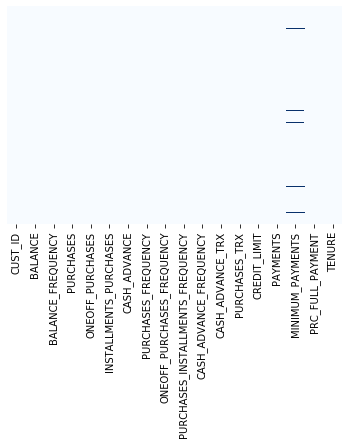

In [5]:
#if we have any missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
#cbar is boolen parameter for color bar
#cmap is color map

In [6]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
#Fill up missing values with mean of 'MINIMUM PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [8]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
#Seeing for duplicated entries in data
creditcard_df.duplicated().sum()

0

In [10]:
#Drop Customer ID column 
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [11]:
n = len(creditcard_df.columns)
n

17

In [12]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

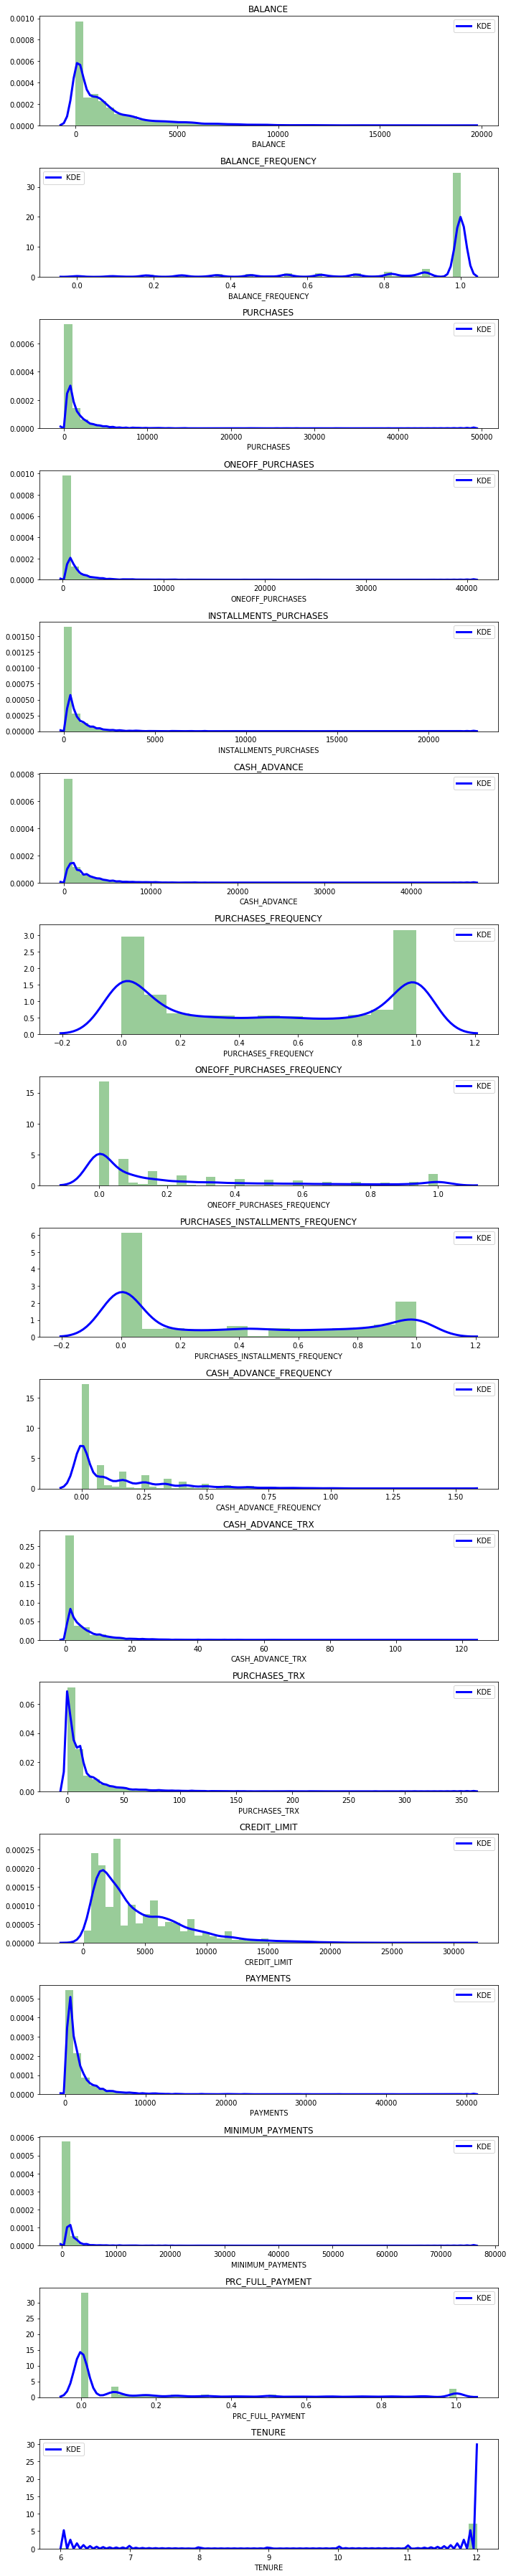

In [17]:
#Plotting a distplot
#from pylab import *

plt.figure(figsize = (10,50))
for i in range(len(creditcard_df.columns)):
    
    plt.subplot(17, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])
    
plt.tight_layout()
#FIGURE is output

2. Find optimal number of clusters using ELBOW method

In [18]:
#Scaling data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [19]:
creditcard_df_scaled.shape

(8950, 17)

In [20]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

We are assuming number of clusters to be 7

3. APPLY K-MEANS METHOD

In [21]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [22]:
kmeans.cluster_centers_.shape

(7, 17)

In [23]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.698093,-2.136393,-0.318208,-0.236671,-0.317490,-0.304208,-0.567618,-0.434477,-0.462518,-0.482531,-0.357779,-0.428141,-0.214042,-0.214240,-0.255252,0.253881,-0.163023
1,1.600789,0.379316,-0.226832,-0.160400,-0.241730,1.946074,-0.481953,-0.204607,-0.431614,1.903022,1.846955,-0.278482,0.967816,0.729276,0.484852,-0.396725,-0.093003
2,-0.011692,0.371425,-0.359251,-0.241742,-0.405220,-0.077756,-0.867792,-0.397987,-0.769584,0.143085,-0.020924,-0.488440,-0.340779,-0.265894,-0.027148,-0.454928,-0.007209
3,1.053284,0.461636,2.479796,1.787872,2.578807,-0.130830,1.164244,1.521062,1.273465,-0.272880,-0.138753,3.091320,1.286904,1.461004,0.740922,0.245378,0.337910
4,-0.122966,0.394560,0.527829,0.649966,0.053750,-0.328941,0.966484,1.849632,0.190670,-0.409403,-0.333689,0.609808,0.430809,0.135608,-0.157219,0.413055,0.208614
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
6,-0.393568,0.308018,-0.061994,-0.255193,0.322201,-0.360787,0.978207,-0.407843,1.171494,-0.460030,-0.355957,0.137689,-0.319617,-0.244094,-0.070642,0.352601,-0.026450


In [24]:
# What the above numbers mean, inverse transformation is performed
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,111.453083,0.371179,323.349198,199.612645,123.965389,340.932230,0.262538,0.072845,0.180621,0.038585,0.807247,4.067849,3715.677636,1112.940730,269.353332,0.227970,11.299152
1,4896.382642,0.967127,518.573813,326.205966,192.474643,5059.878665,0.296919,0.141419,0.192903,0.515958,15.852941,7.787815,8015.761077,3844.326056,1994.134566,0.037679,11.392857
2,1540.138030,0.965258,235.658503,191.195217,44.632015,815.812950,0.142064,0.083730,0.058585,0.163777,3.106035,2.569042,3254.557336,963.405858,800.939655,0.020656,11.507671
3,3756.797270,0.986628,6301.327701,3559.939307,2743.050443,704.514470,0.957618,0.656220,0.870545,0.080538,2.301939,91.548476,9176.731302,5962.607220,2590.893824,0.225483,11.969529
4,1308.532426,0.970738,2130.920509,1671.247306,459.673203,289.067000,0.878247,0.754239,0.440214,0.053218,0.971643,29.867389,6061.909167,2125.715666,497.815124,0.274526,11.796497
5,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
6,745.295702,0.950237,870.753739,168.869739,702.430124,222.283700,0.882952,0.080790,0.830019,0.043087,0.819680,18.132265,3331.550748,1026.514628,699.579241,0.256844,11.481922


In [25]:
labels.shape

(8950,)

In [26]:
labels.max()

6

In [27]:
labels.min()

0

In [28]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 1, 3, ..., 0, 0, 0])

In [29]:
# Concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


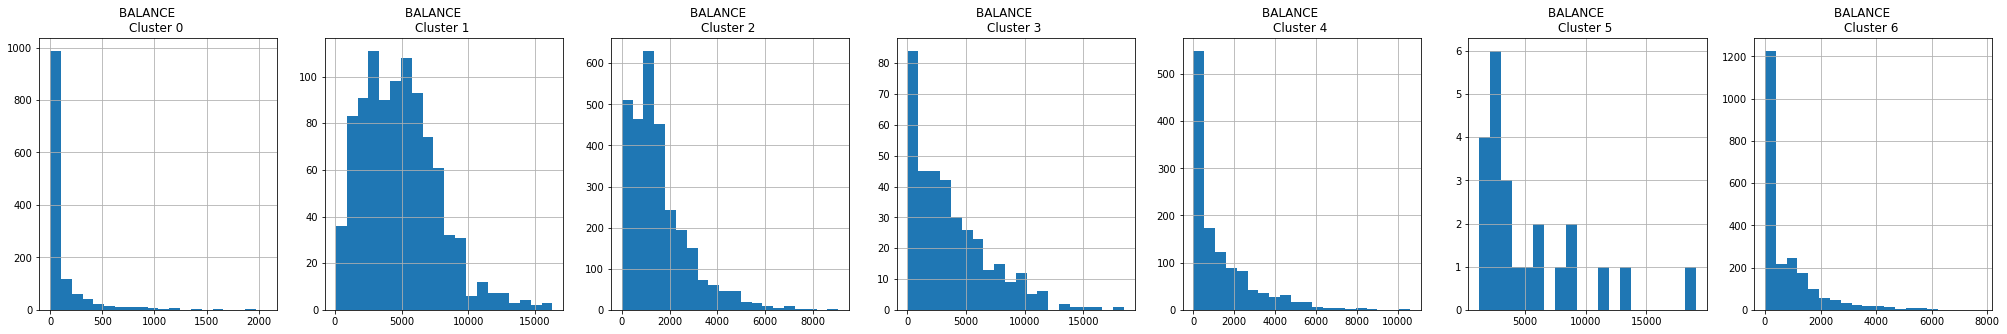

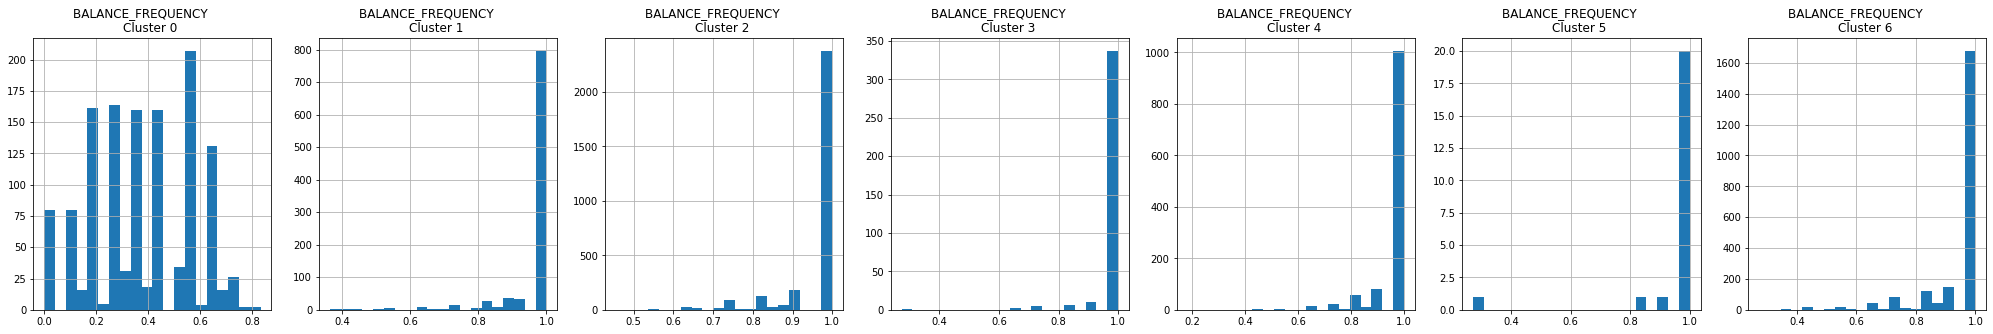

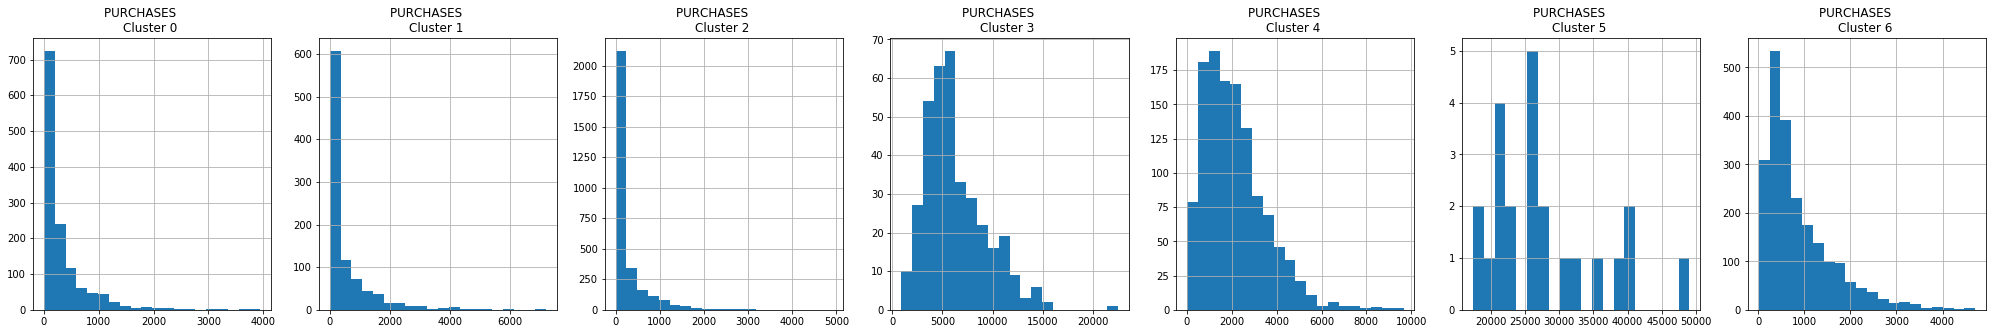

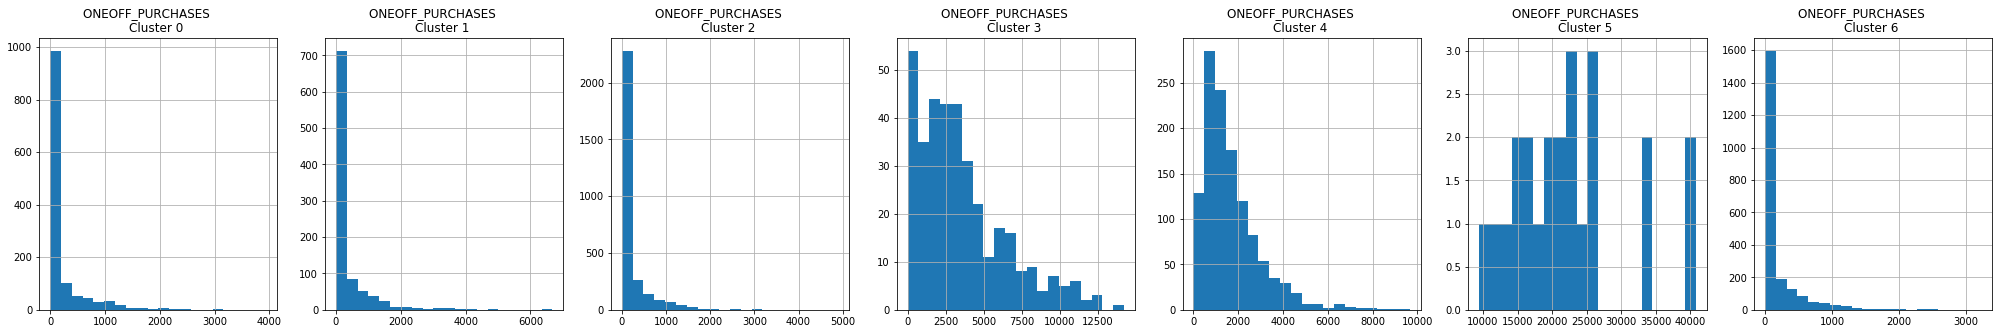

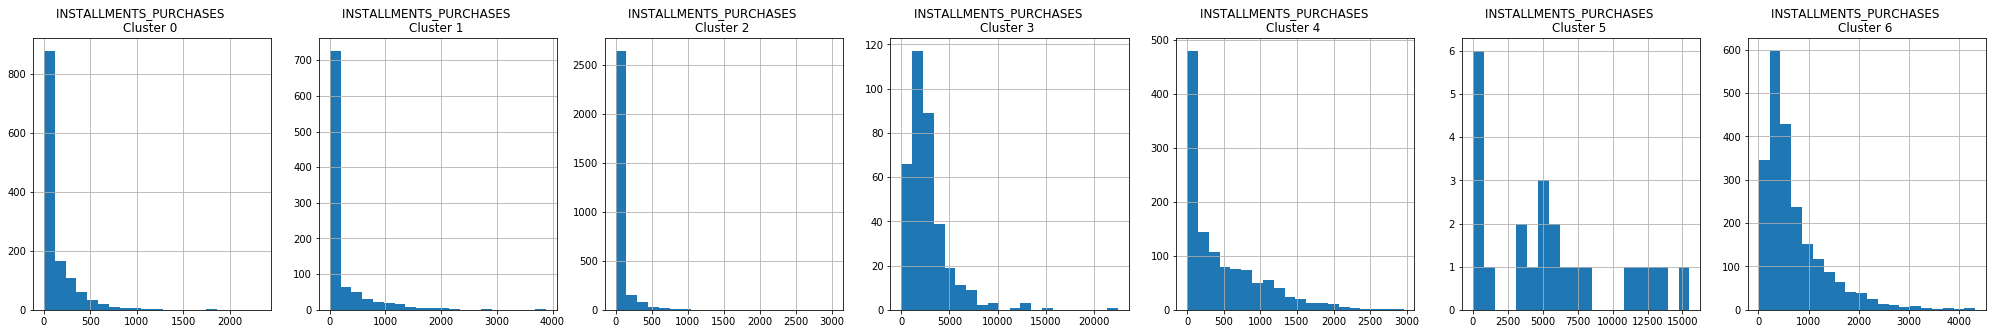

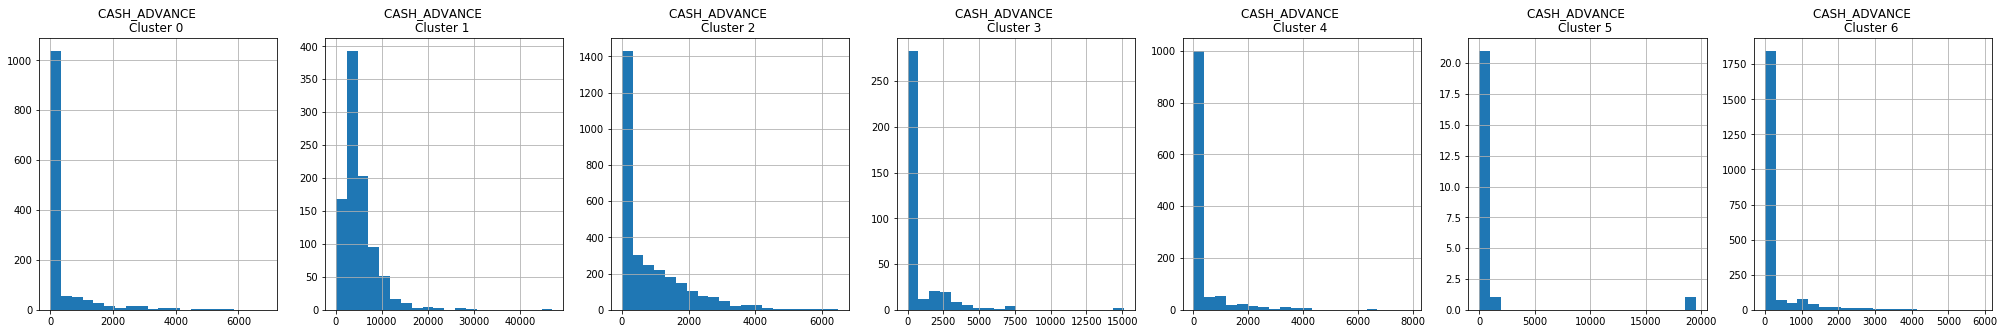

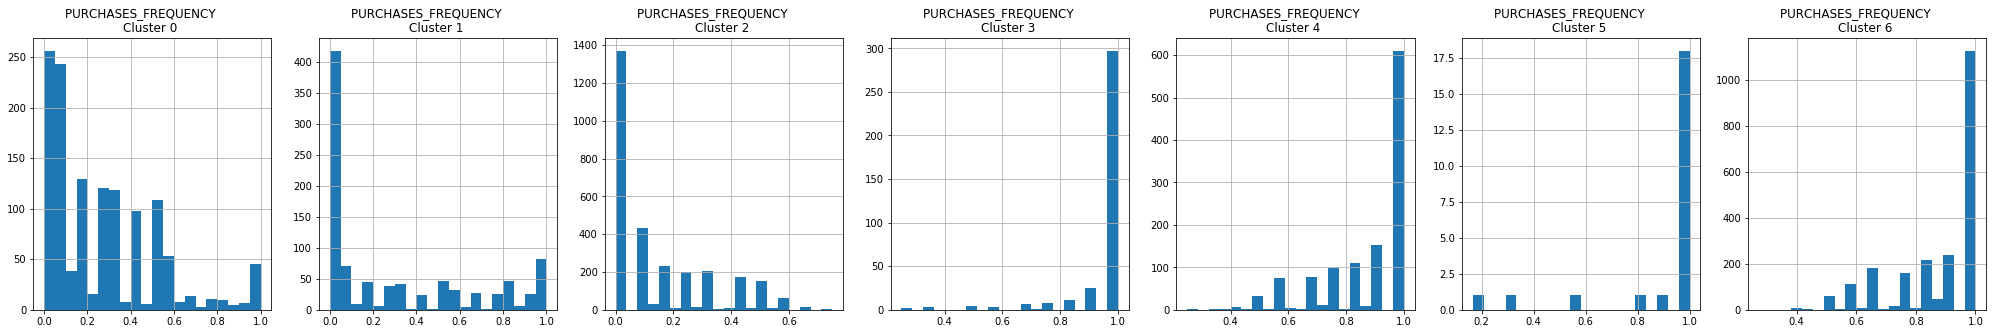

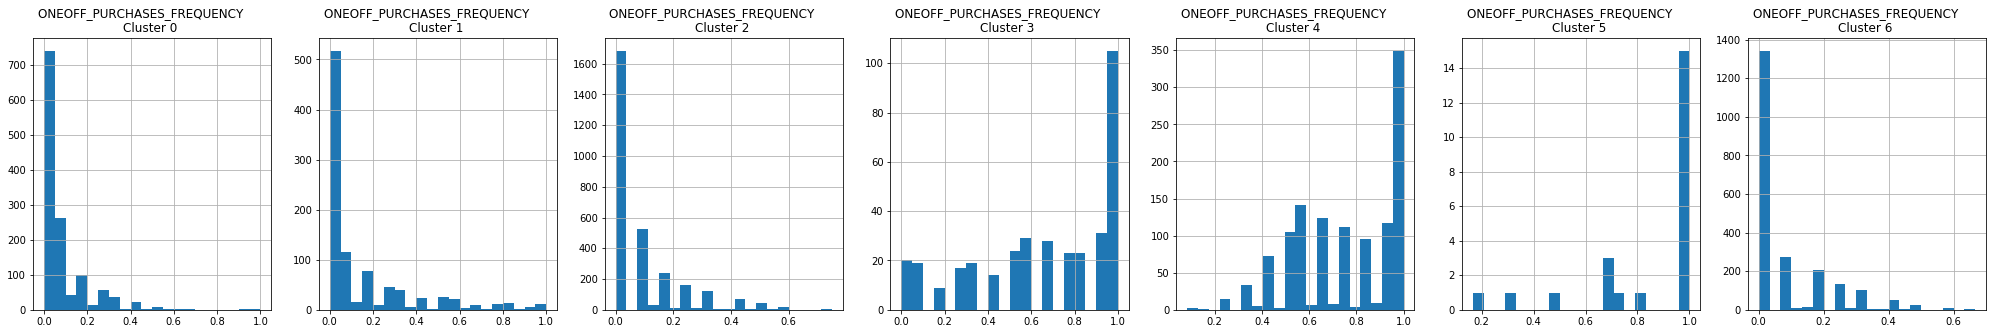

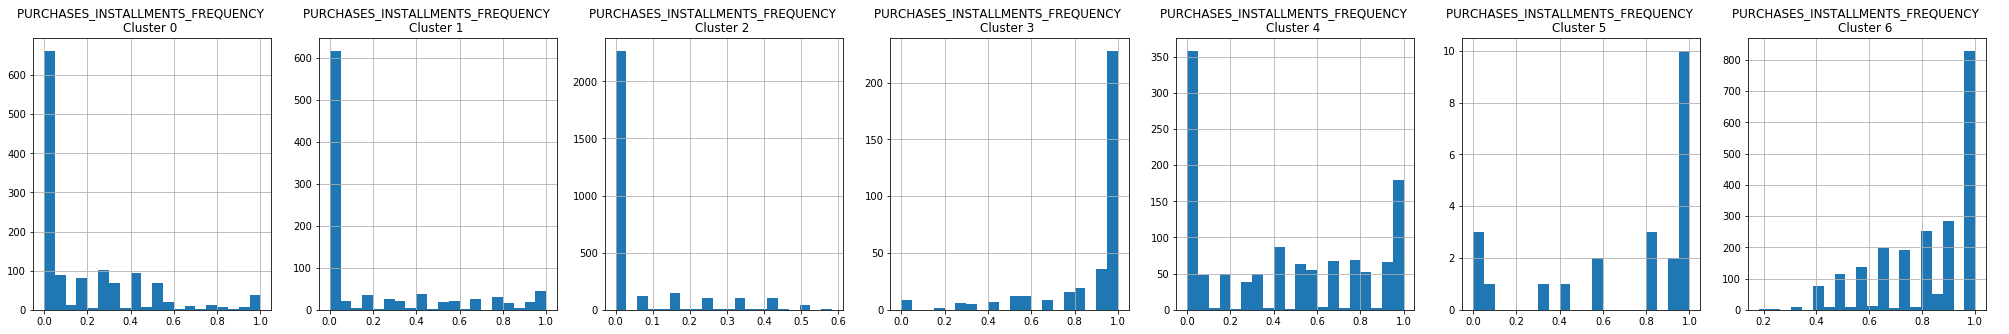

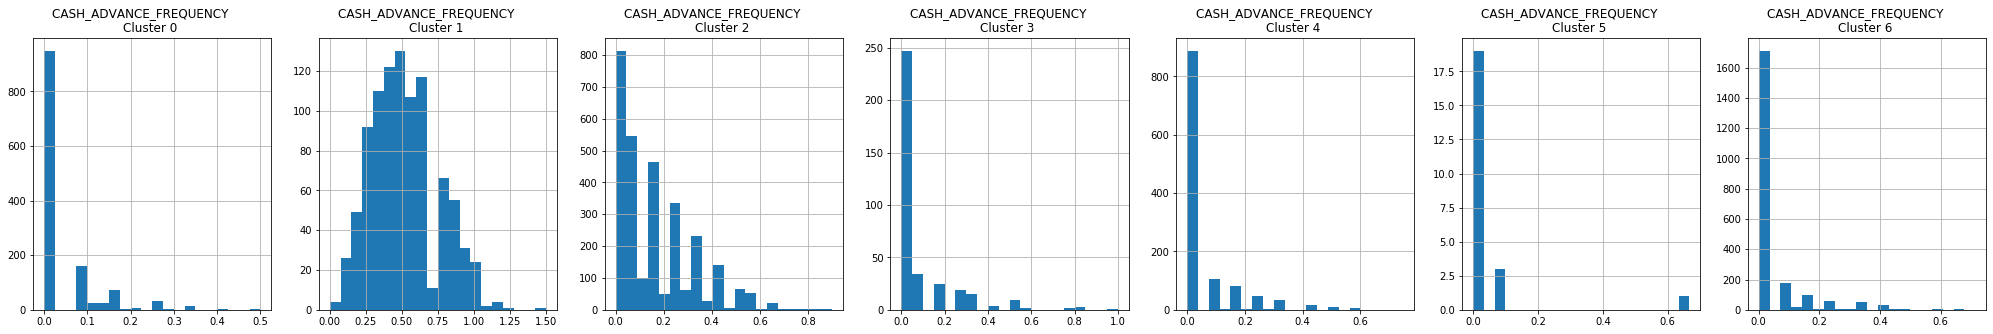

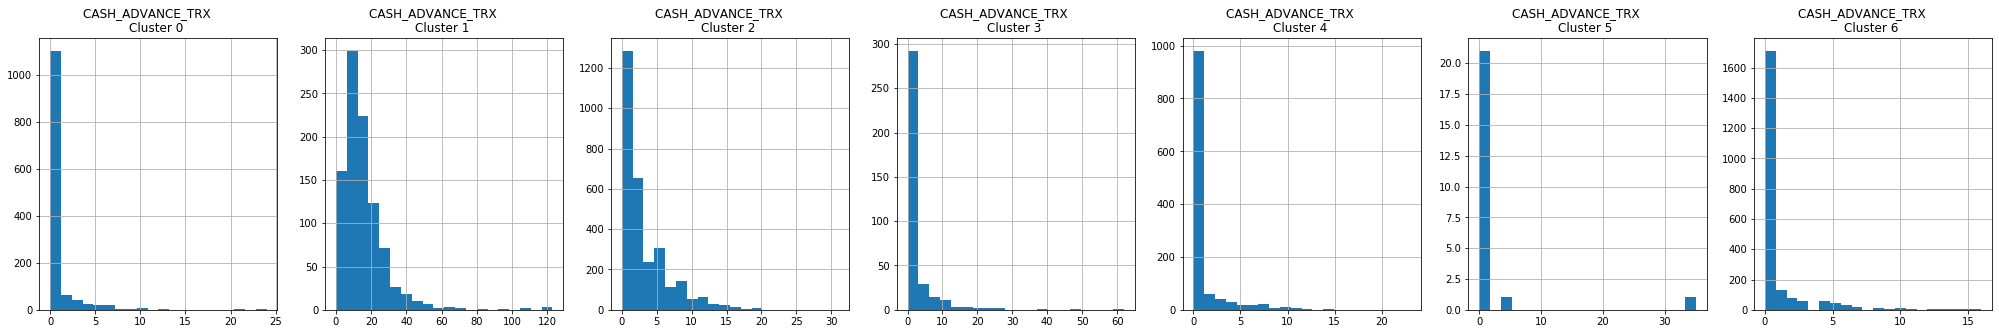

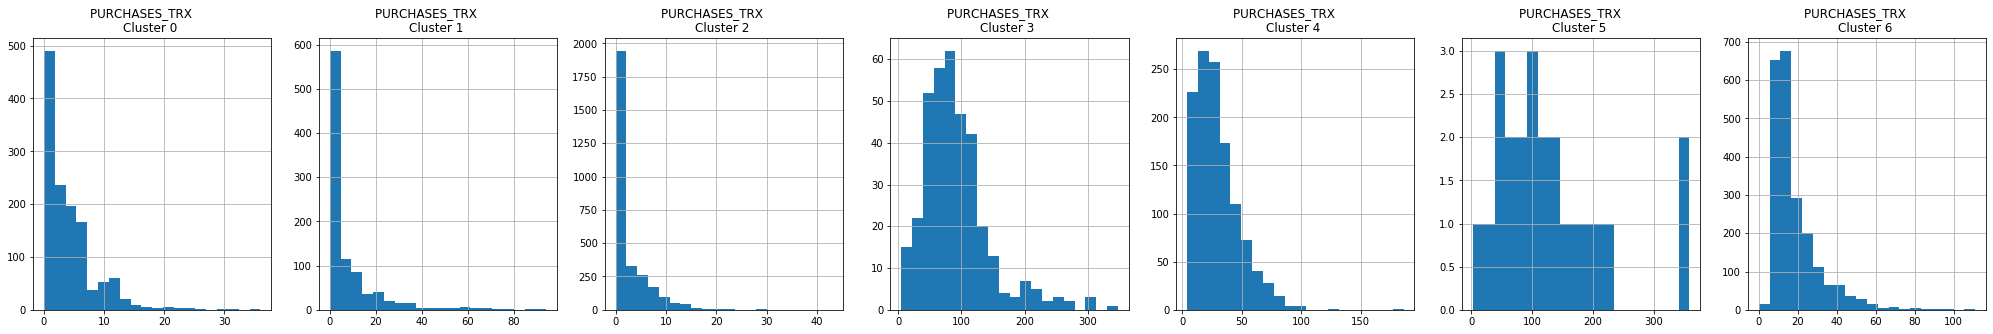

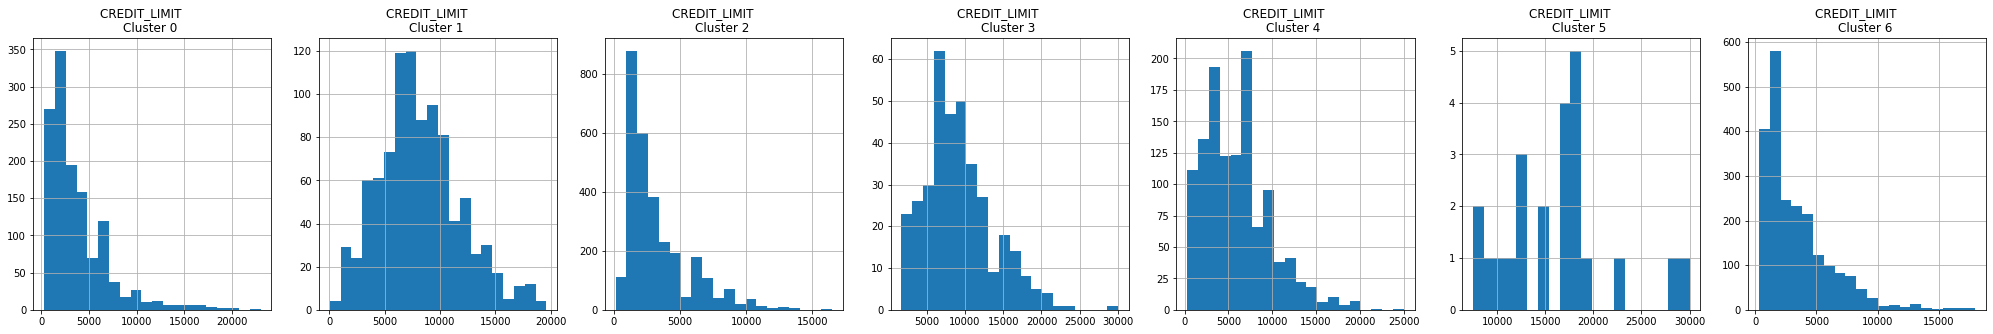

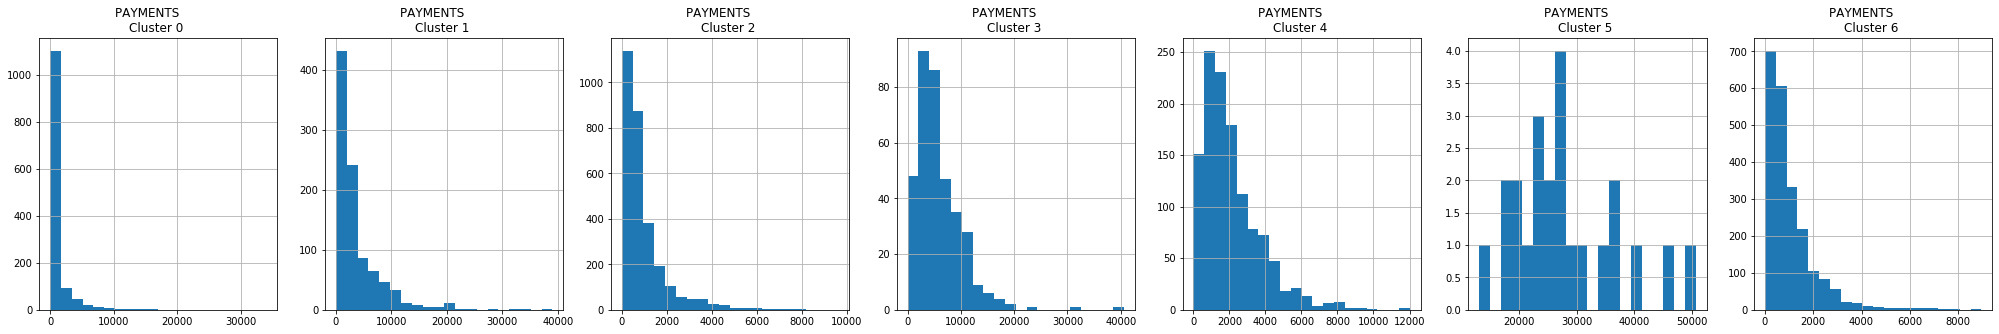

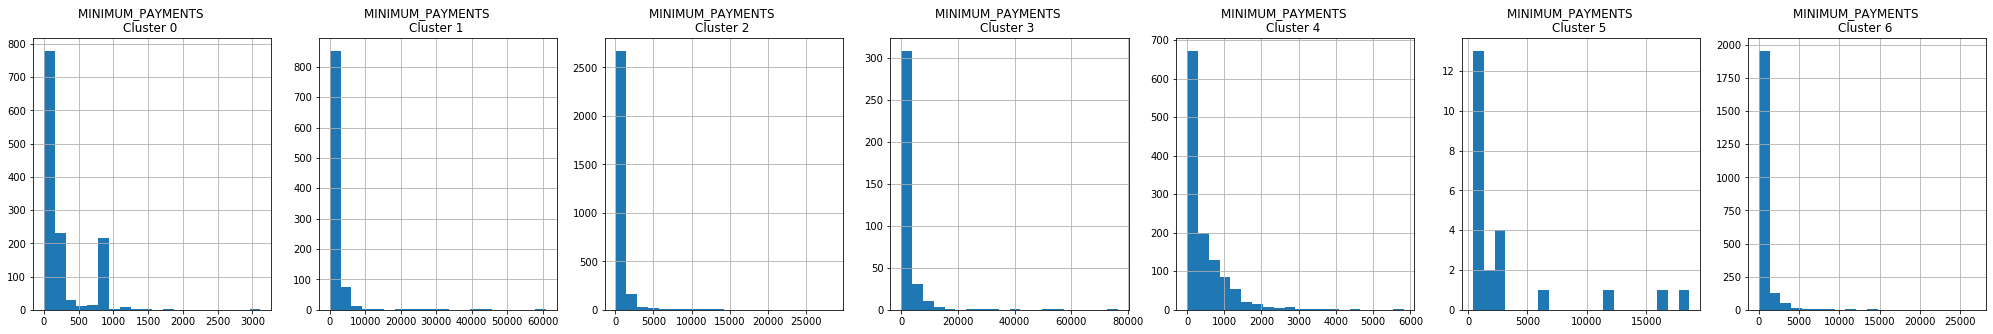

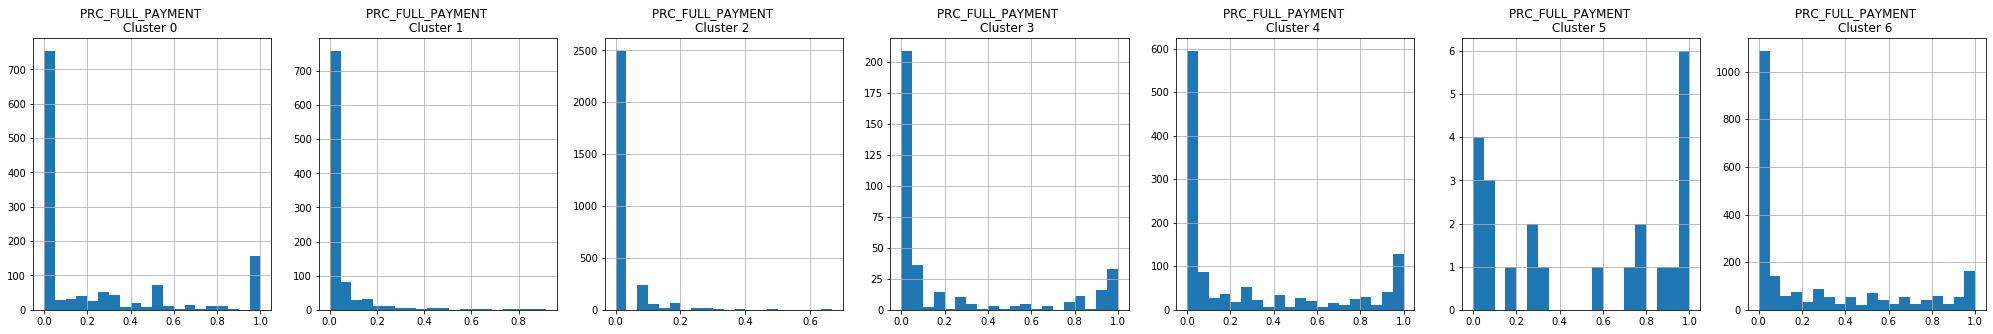

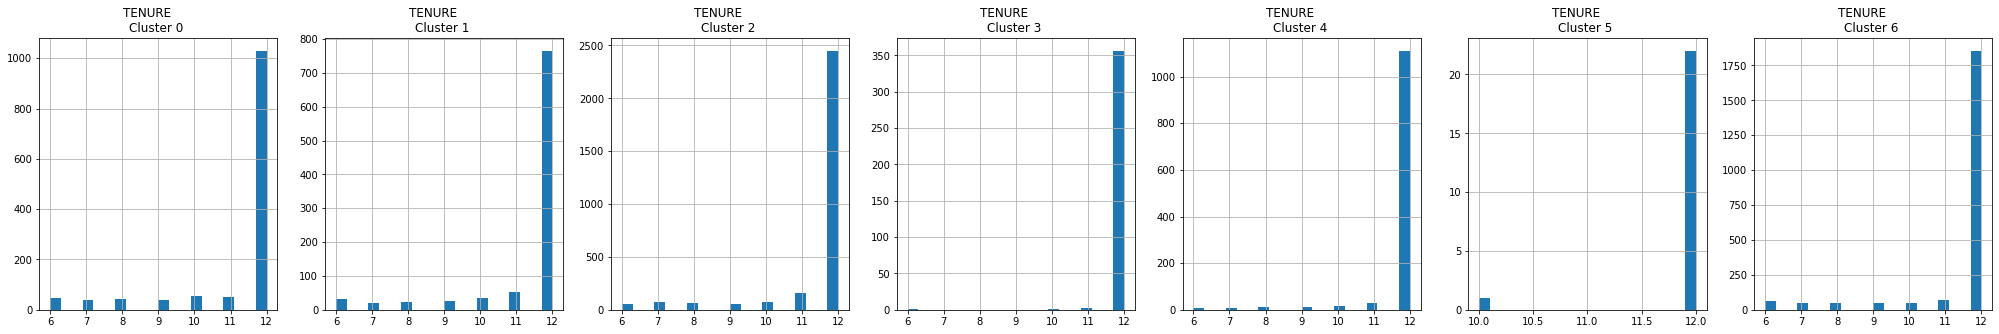

In [30]:
#Plot Histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(7):
        plt.subplot(1, 7, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}      \nCluster {} '. format(i,j))
    plt.show()

4. APPLY PRINCIPAL COMPONENT ANALYSIS & VISUALIZE THE DATA

In [31]:
#Principal Components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221992, -1.07644789],
       [-1.13828728,  2.5064553 ],
       [ 0.96970157, -0.38356474],
       ...,
       [-0.92621057, -1.81076163],
       [-2.3365593 , -0.65794417],
       [-0.55641926, -0.40048444]])

In [34]:
pca_df = pd.DataFrame(data = principal_comp, columns = {'pca1', 'pca2'})
pca_df.head()

,pca2,pca1
0,-1.682220,-1.076448
1,-1.138287,2.506455
2,0.969702,-0.383565
3,-0.873634,0.043184
4,-1.599431,-0.688584


In [35]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca2,pca1,cluster
0,-1.682220,-1.076448,2
1,-1.138287,2.506455,1
2,0.969702,-0.383565,4
3,-0.873634,0.043184,2
4,-1.599431,-0.688584,2


,pca2,pca1,cluster
0,-1.682220,-1.076448,2
1,-1.138287,2.506455,1
2,0.969702,-0.383565,4
3,-0.873634,0.043184,2
4,-1.599431,-0.688584,2


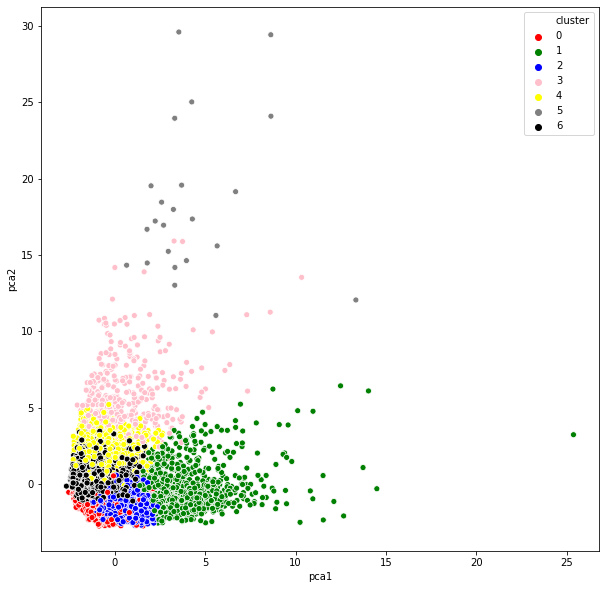

In [36]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data =pca_df, palette =['red', 'green', 'blue','pink','yellow','gray','black'])
pca_df.head()

In [37]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [39]:
#Average, minimum and maximum balance amounts
print("The average, minimum and maximum amounts are:", creditcard_df['BALANCE'].mean(), creditcard_df['BALANCE'].min(), creditcard_df['BALANCE'].max())

The average, minimum and maximum amounts are: 1564.4748276781038 0.0 19043.13856


In [40]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [41]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

#CORRELATON PLOT

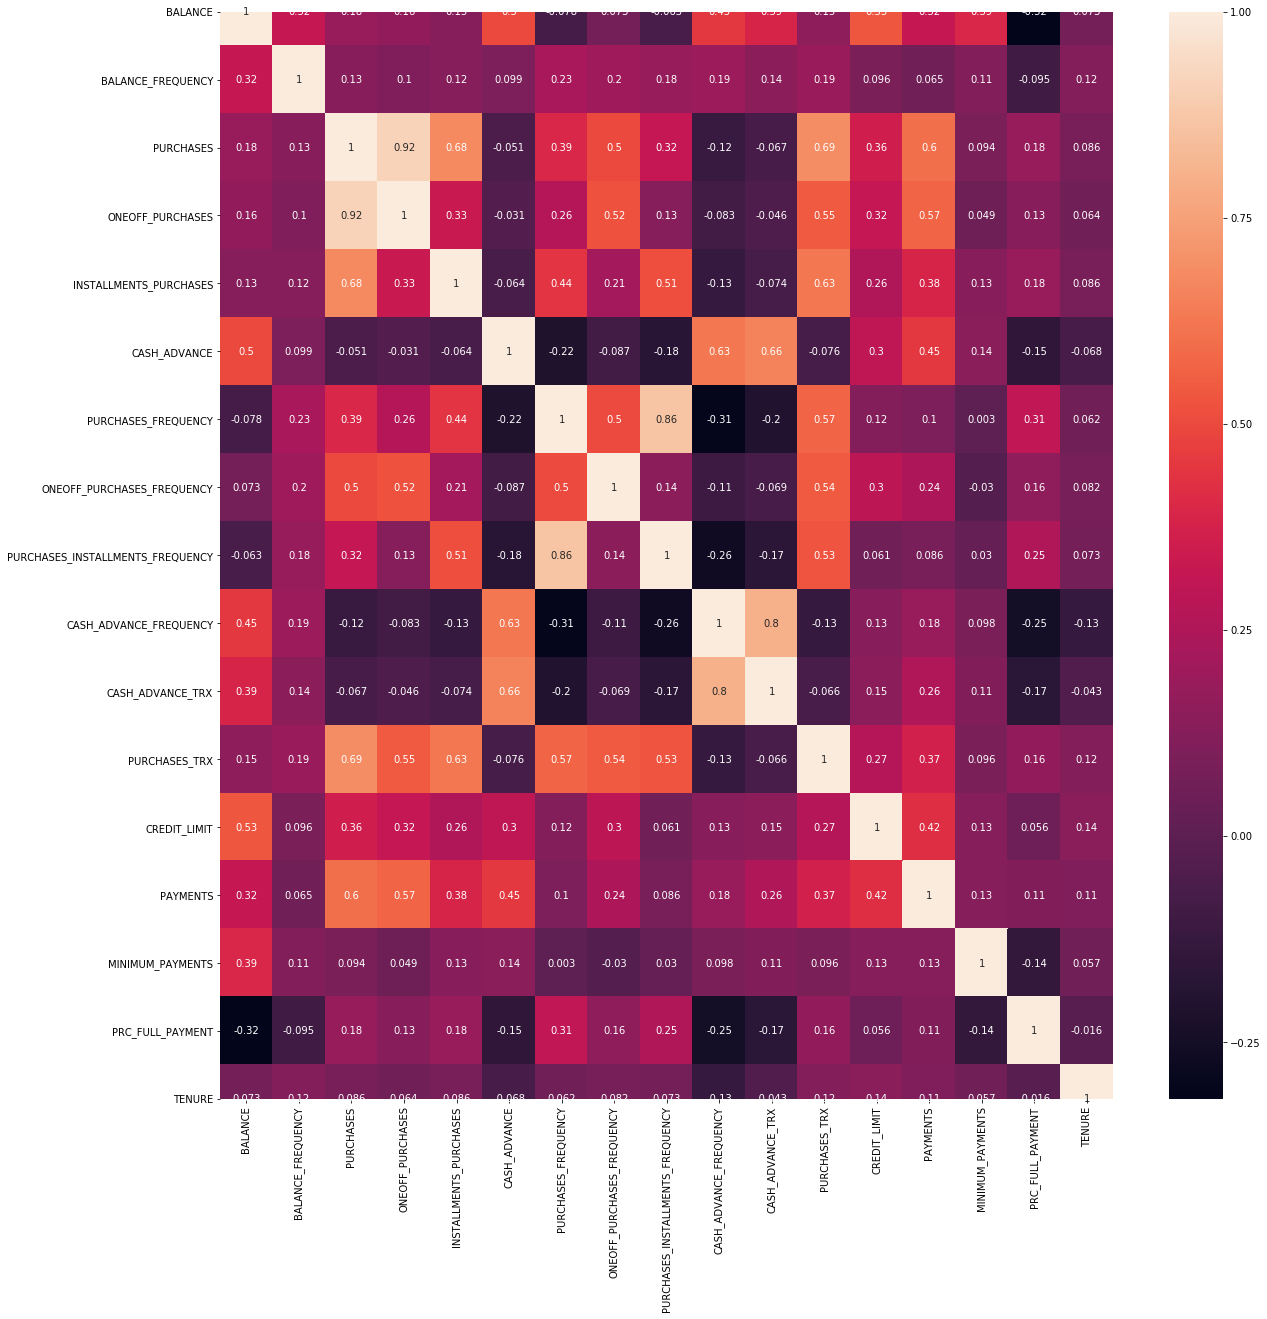

In [42]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)